<h1><center><font size=10><font color='green'>**Credit card fraud detection**</font></font></center></h1>

<h1><font size=4><font color='brown'>**Setting the working directory**</font></font></h1>

In [1]:
%cd "C:\Users\vibhanshuv\Downloads\credit card"

C:\Users\vibhanshuv\Downloads\credit card


<h1><font size=4><font color='brown'>**Importing dependencies**</font></font></h1>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

<h1><font size=4><font color='brown'>**Importing CSV file**</font></font></h1>

In [3]:
df=pd.read_csv('creditcard.csv',sep=",")

In [4]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### V1...V28 are values which are obtained from PCA
#### Time is the second elapsed between each transaction and the first transaction in the dataset
#### Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). 


<h1><center><font size=5><font color='Indigo'>**EDA**</font></font></center></h1>

### Finding Correlation 

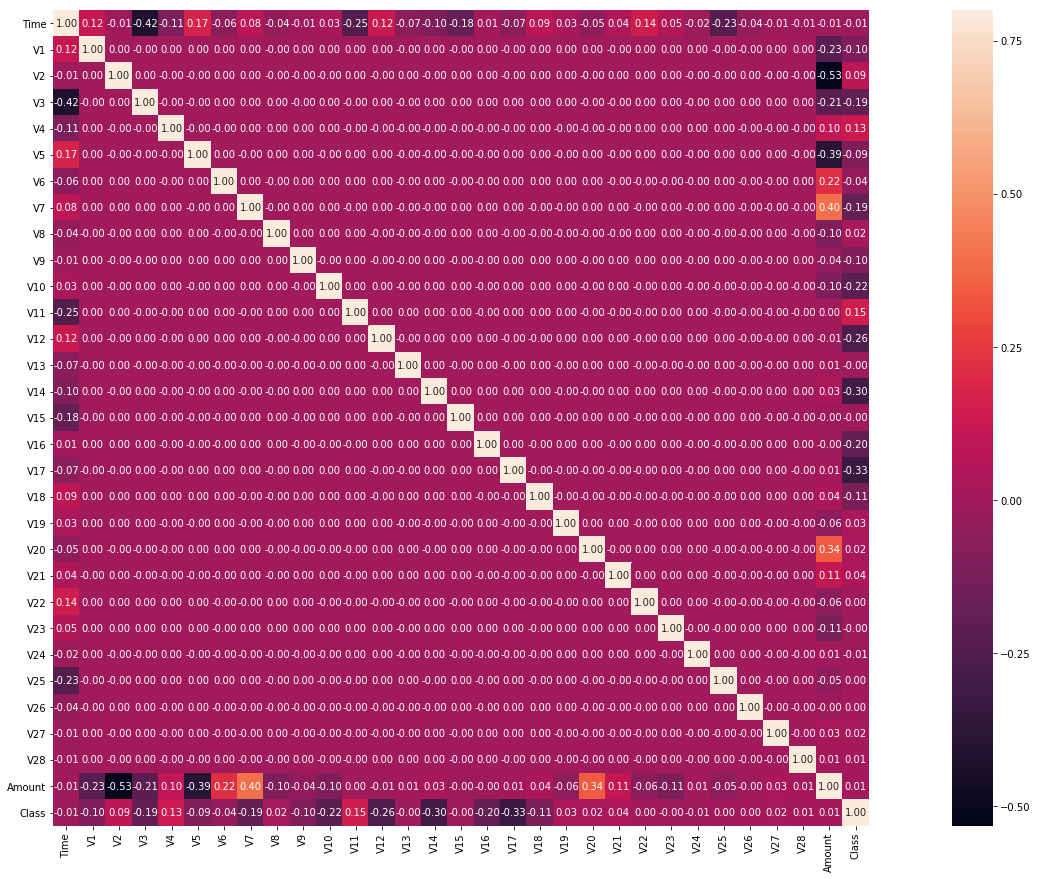

In [7]:
corrmat=df.corr()
f,ax=plt.subplots(figsize=(30,15))
sns.heatmap(corrmat,vmax=0.8,square=True,annot=True,fmt='.2f')

Text(0,0.5,'Frequency')

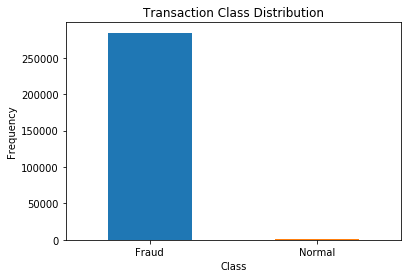

In [8]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
LABELS={'Normal','Fraud'}
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [9]:
Fraud = df[df['Class']==1]
Normal = df[df['Class']==0]

In [10]:
Fraud.shape

(492, 31)

In [11]:
Normal.shape

(284315, 31)

### Difference in the amount spent in both the cases

In [12]:
Fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
Normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

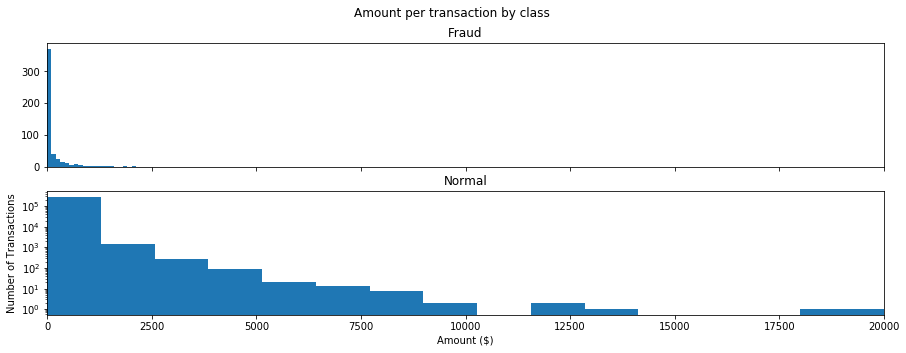

In [14]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True,figsize=(15,5))
f.suptitle('Amount per transaction by class')
bins = 20
ax1.hist(Fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(Normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

### Do fraudulent transactions occur during a certain time frame?

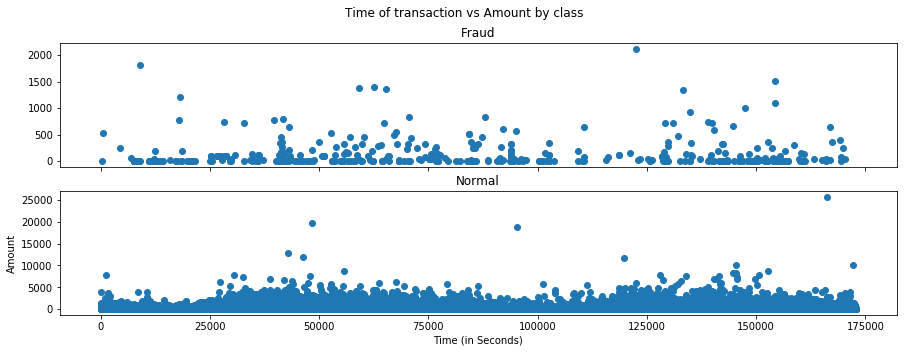

In [15]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True,figsize=(15,5))
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(Fraud.Time, Fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(Normal.Time, Normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

### Scaling the value of Amount

In [16]:
from sklearn.preprocessing import StandardScaler

df['normAmount'] = StandardScaler().fit_transform(df['Amount'].reshape(-1, 1))
df.head()

C:\Users\vibhanshuv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,normAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403


### Splitting into X_train and X_test

In [17]:
df = df.drop(['Time', 'Amount'], axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [18]:
X = np.array(df.ix[:, df.columns != 'Class'])
y = np.array(df.ix[:, df.columns == 'Class'])

C:\Users\vibhanshuv\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (199364, 29)
Number transactions y_train dataset:  (199364, 1)
Number transactions X_test dataset:  (85443, 29)
Number transactions y_test dataset:  (85443, 1)


<h1><center><font size=5><font color='Indigo'>**Sampling**</font></font></center></h1>

### Random UnderSampling

In [156]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X_train, y_train)

In [161]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_rus,y_rus)

C:\Users\vibhanshuv\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [168]:
y_pred_sample_score=model.decision_function(X_test)

In [171]:
y_pred_sample_score

array([ 0.11530009, -0.12124037, -0.18028226, ..., -0.04525236,
       -0.18079565, -0.12757438])

In [169]:
roc_auc_score(y_test, y_pred_sample_score)

0.974262456342507

In [170]:
average_precision_score(y_test, y_pred_sample_score)

0.5247082569650984

### Random OverSampling

In [184]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X_train, y_train)

C:\Users\vibhanshuv\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [185]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_ros,y_ros)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [186]:
y_true=model.decision_function(X_test)

In [187]:
roc_auc_score(y_test, y_true)

0.9617633256641617

In [188]:
average_precision_score(y_test, y_true)

0.7413759779285529

###  Tomek links (removing the neighbour which is of majority class)

In [189]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X_train, y_train)

C:\Users\vibhanshuv\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [190]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_tl, y_tl)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [191]:
y_true=model.decision_function(X_test)

In [192]:
roc_auc_score(y_test, y_true)

0.9701842610989246

In [193]:
average_precision_score(y_test, y_true)

0.7614550005776494

### Under-sampling: Cluster Centroids

In [194]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(ratio={0: 10})
X_cc, y_cc = cc.fit_sample(X_train, y_train)

C:\Users\vibhanshuv\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [195]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_cc, y_cc)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [196]:
y_true=model.decision_function(X_test)

In [197]:
roc_auc_score(y_test, y_true)

0.941986816298457

In [198]:
average_precision_score(y_test, y_true)

0.10581356666792367

### Smote

In [199]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X_train, y_train)

C:\Users\vibhanshuv\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [200]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_sm, y_sm)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [201]:
y_true=model.decision_function(X_test)

In [202]:
roc_auc_score(y_test, y_true)

0.9661086578694505

In [203]:
average_precision_score(y_test, y_true)

0.770757041781984

### Over-sampling followed by under-sampling (SMOTE+TOMEK)

In [214]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X_train, y_train)

C:\Users\vibhanshuv\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [215]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_smt, y_smt)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [216]:
y_true=model.decision_function(X_test)

In [217]:
roc_auc_score(y_test, y_true)

0.9635913735218342

In [218]:
average_precision_score(y_test, y_true)

0.7822991427113013

### Over-sampling followed by under-sampling (SMOTE+ENN)

In [209]:
from imblearn.combine import SMOTEENN
sme = SMOTEENN(ratio='auto')
X_sme, y_sme = sme.fit_sample(X_train, y_train)

C:\Users\vibhanshuv\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [210]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_sme, y_sme)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [211]:
y_true=model.decision_function(X_test)

In [212]:
roc_auc_score(y_test, y_true)

0.9664037088292454

In [213]:
average_precision_score(y_test, y_true)

0.7894164945161828

### We will use (Smote+ENN) sampling since it is giving the best result

In [229]:
from imblearn.combine import SMOTEENN
sme = SMOTEENN(ratio='auto')
X_sme, y_sme = sme.fit_sample(X_train, y_train)

C:\Users\vibhanshuv\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Logistic Regression

In [230]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
from sklearn.model_selection import GridSearchCV
parameters={'C':[1.0,10.,50.0,100.0,500.0,1000.0],'penalty':['l1','l2']}
clf=GridSearchCV(model,param_grid=parameters,cv=3,verbose=2)
clf.fit(X_sme, y_sme)
clf.best_params_

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] C=1.0, penalty=l1 ...............................................
[CV] ................................ C=1.0, penalty=l1, total=  11.0s
[CV] C=1.0, penalty=l1 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.1s remaining:    0.0s


[CV] ................................ C=1.0, penalty=l1, total=   7.7s
[CV] C=1.0, penalty=l1 ...............................................
[CV] ................................ C=1.0, penalty=l1, total=   8.5s
[CV] C=1.0, penalty=l2 ...............................................
[CV] ................................ C=1.0, penalty=l2, total=   5.0s
[CV] C=1.0, penalty=l2 ...............................................
[CV] ................................ C=1.0, penalty=l2, total=   4.3s
[CV] C=1.0, penalty=l2 ...............................................
[CV] ................................ C=1.0, penalty=l2, total=   4.5s
[CV] C=10.0, penalty=l1 ..............................................
[CV] ............................... C=10.0, penalty=l1, total=  10.0s
[CV] C=10.0, penalty=l1 ..............................................
[CV] ............................... C=10.0, penalty=l1, total=   9.0s
[CV] C=10.0, penalty=l1 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  4.8min finished


{'C': 50.0, 'penalty': 'l2'}

In [231]:
print('best score :{0:.2F}'.format(clf.best_score_))

best score :0.95


In [232]:
y_true=clf.decision_function(X_test)

In [233]:
roc_auc_score(y_test, y_true)

0.9842729344598466

In [234]:
average_precision_score(y_test, y_true)

0.7578680107179503

### Decision Tree

In [235]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV
parameters={'max_depth':[1,5,10],'max_features':[3,5,7]}
clf=GridSearchCV(model,param_grid=parameters,cv=3,verbose=2)
clf.fit(X_sme, y_sme)
clf.best_params_

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] max_depth=1, max_features=3 .....................................
[CV] ...................... max_depth=1, max_features=3, total=   0.4s
[CV] max_depth=1, max_features=3 .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ...................... max_depth=1, max_features=3, total=   0.2s
[CV] max_depth=1, max_features=3 .....................................
[CV] ...................... max_depth=1, max_features=3, total=   0.2s
[CV] max_depth=1, max_features=5 .....................................
[CV] ...................... max_depth=1, max_features=5, total=   0.2s
[CV] max_depth=1, max_features=5 .....................................
[CV] ...................... max_depth=1, max_features=5, total=   0.2s
[CV] max_depth=1, max_features=5 .....................................
[CV] ...................... max_depth=1, max_features=5, total=   0.2s
[CV] max_depth=1, max_features=7 .....................................
[CV] ...................... max_depth=1, max_features=7, total=   0.4s
[CV] max_depth=1, max_features=7 .....................................
[CV] ...................... max_depth=1, max_features=7, total=   0.3s
[CV] max_depth=1, max_features=7 .....................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   31.7s finished


{'max_depth': 10, 'max_features': 7}

In [237]:
y_true=clf.predict_proba(X_test)[:,1]

In [238]:
roc_auc_score(y_test, y_true)

0.8737266830386253

In [239]:
average_precision_score(y_test, y_true)

0.5504907076372201

### Random Forest

In [242]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[1,10,100,1000],'criterion':['gini','entropy']}
clf=GridSearchCV(model,param_grid=parameters,cv=3,verbose=2)
clf.fit(X_sme, y_sme)
clf.best_params_

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] criterion=gini, n_estimators=1 ..................................
[CV] ................... criterion=gini, n_estimators=1, total=   1.4s
[CV] criterion=gini, n_estimators=1 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] ................... criterion=gini, n_estimators=1, total=   1.9s
[CV] criterion=gini, n_estimators=1 ..................................
[CV] ................... criterion=gini, n_estimators=1, total=   1.4s
[CV] criterion=gini, n_estimators=10 .................................
[CV] .................. criterion=gini, n_estimators=10, total=  15.7s
[CV] criterion=gini, n_estimators=10 .................................
[CV] .................. criterion=gini, n_estimators=10, total=  14.8s
[CV] criterion=gini, n_estimators=10 .................................
[CV] .................. criterion=gini, n_estimators=10, total=  15.4s
[CV] criterion=gini, n_estimators=100 ................................
[CV] ................. criterion=gini, n_estimators=100, total= 2.5min
[CV] criterion=gini, n_estimators=100 ................................
[CV] ................. criterion=gini, n_estimators=100, total= 2.5min
[CV] criterion=gini, n_estimators=100 ................................
[CV] .

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 166.0min finished


{'criterion': 'entropy', 'n_estimators': 1000}

In [243]:
y_true=clf.predict_proba(X_test)[:,1]

In [244]:
roc_auc_score(y_test, y_true)

0.9788023491144722

In [245]:
average_precision_score(y_test, y_true)

0.8467080865822247

### Adaboosting Classifier

In [246]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier()
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[1,50,100],'learning_rate':[0.01,0.1,1,2,10]}
clf=GridSearchCV(model,param_grid=parameters,cv=3,verbose=2)
clf.fit(X_sme, y_sme)
clf.best_params_

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] learning_rate=0.01, n_estimators=1 ..............................
[CV] ............... learning_rate=0.01, n_estimators=1, total=   1.4s
[CV] learning_rate=0.01, n_estimators=1 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] ............... learning_rate=0.01, n_estimators=1, total=   1.3s
[CV] learning_rate=0.01, n_estimators=1 ..............................
[CV] ............... learning_rate=0.01, n_estimators=1, total=   1.3s
[CV] learning_rate=0.01, n_estimators=50 .............................
[CV] .............. learning_rate=0.01, n_estimators=50, total= 1.1min
[CV] learning_rate=0.01, n_estimators=50 .............................
[CV] .............. learning_rate=0.01, n_estimators=50, total= 1.1min
[CV] learning_rate=0.01, n_estimators=50 .............................
[CV] .............. learning_rate=0.01, n_estimators=50, total= 1.1min
[CV] learning_rate=0.01, n_estimators=100 ............................
[CV] ............. learning_rate=0.01, n_estimators=100, total= 2.2min
[CV] learning_rate=0.01, n_estimators=100 ............................
[CV] ............. learning_rate=0.01, n_estimators=100, total= 2.2min
[CV] learning_rate=0.01, n_estimators=100 ............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 41.2min finished


{'learning_rate': 1, 'n_estimators': 100}

In [247]:
y_true=clf.predict_proba(X_test)[:,1]

In [248]:
roc_auc_score(y_test, y_true)

0.967137966610392

In [249]:
average_precision_score(y_test, y_true)

0.8045966536786796

### Random Forest algorithm gives the best average precision score

In [21]:
from imblearn.combine import SMOTEENN
sme = SMOTEENN(ratio='auto')
X_sme, y_sme = sme.fit_sample(X_train, y_train)

C:\Users\vibhanshuv\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=1000,criterion='entropy')
from sklearn.model_selection import GridSearchCV
parameters={'max_depth':[4,10,None]}
clf=GridSearchCV(model,param_grid=parameters,cv=5,verbose=2)
clf.fit(X_sme, y_sme)
clf.best_params_

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] max_depth=4 .....................................................
[CV] ...................................... max_depth=4, total=15.7min
[CV] max_depth=4 .....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 16.1min remaining:    0.0s


[CV] ...................................... max_depth=4, total=15.1min
[CV] max_depth=4 .....................................................
[CV] ...................................... max_depth=4, total=15.2min
[CV] max_depth=4 .....................................................
[CV] ...................................... max_depth=4, total=15.2min
[CV] max_depth=4 .....................................................
[CV] ...................................... max_depth=4, total=15.0min
[CV] max_depth=10 ....................................................
[CV] ..................................... max_depth=10, total=29.1min
[CV] max_depth=10 ....................................................
[CV] ..................................... max_depth=10, total=27.6min
[CV] max_depth=10 ....................................................
[CV] ..................................... max_depth=10, total=29.0min
[CV] max_depth=10 ....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 379.5min finished


{'max_depth': None}

In [23]:
y_true=clf.predict_proba(X_test)[:,1]

In [24]:
roc_auc_score(y_test, y_true)

0.9836768509692378

In [25]:
average_precision_score(y_test, y_true)

0.8460433695530951

In [26]:
from sklearn.metrics import precision_recall_curve

In [27]:
precision, recall, thresholds=precision_recall_curve(y_test, y_true)

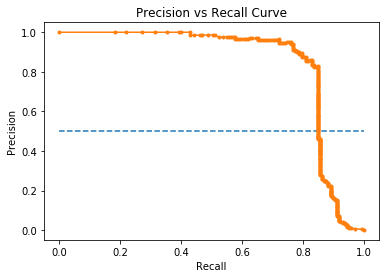

In [42]:
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the roc curve for the model
plt.plot(recall, precision, marker='.')
# show the plot
plt.title('Precision vs Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

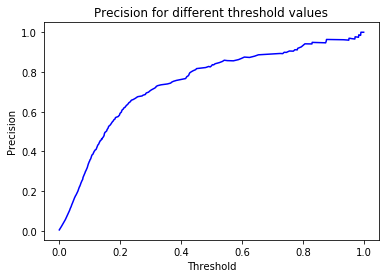

In [29]:
plt.plot(thresholds, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

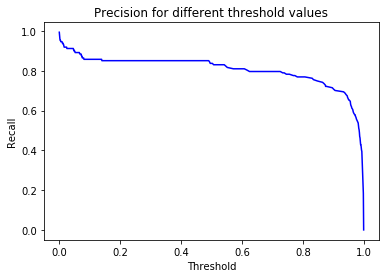

In [32]:
plt.plot(thresholds, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.show()

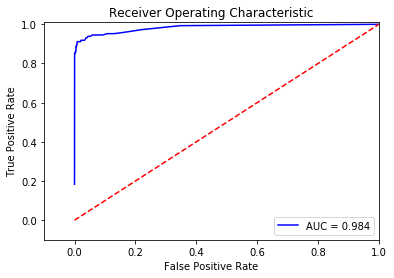

In [33]:
fpr, tpr, thresholds = roc_curve(y_test, y_true)
roc_auc = auc(fpr,tpr)
# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [40]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the testing dataset:  0.8367346938775511


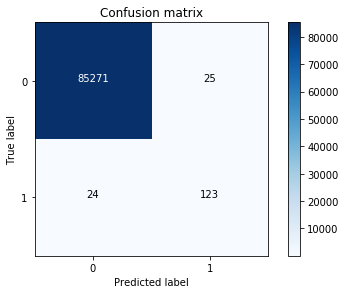

In [41]:
cnf_matrix = confusion_matrix(y_test,clf.predict(X_test))
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

<h1><center><font size=5><font color='Indigo'>**Autoencoder**</font></font></center></h1>

### Building the model

In [111]:
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint
from keras import regularizers

#####  Autoencoder uses 4 fully connected layers with 14, 7, 7 and 29 neurons respectively. The first two layers are used for our encoder, the last two go for the decoder. Additionally, L1 regularization will be used during training:

In [112]:
input_dim = X_train.shape[1]
encoding_dim = 14
input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [113]:
nb_epoch = 300
batch_size = 32
autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="autoencoder.h5", verbose=0, save_best_only=True)
history = autoencoder.fit(X_train, X_train,epochs=nb_epoch,batch_size=batch_size,shuffle=True,validation_data=(X_test, X_test),verbose=2,callbacks=[checkpointer]).history

Train on 199364 samples, validate on 85443 samples
Epoch 1/300
 - 5s - loss: 0.8556 - acc: 0.5925 - val_loss: 0.7943 - val_acc: 0.6654
Epoch 2/300
 - 5s - loss: 0.7853 - acc: 0.6689 - val_loss: 0.7784 - val_acc: 0.6804
Epoch 3/300
 - 5s - loss: 0.7753 - acc: 0.6805 - val_loss: 0.7785 - val_acc: 0.6804
Epoch 4/300
 - 5s - loss: 0.7702 - acc: 0.6862 - val_loss: 0.7679 - val_acc: 0.6908
Epoch 5/300
 - 5s - loss: 0.7670 - acc: 0.6911 - val_loss: 0.7652 - val_acc: 0.6992
Epoch 6/300
 - 5s - loss: 0.7646 - acc: 0.6967 - val_loss: 0.7649 - val_acc: 0.7004
Epoch 7/300
 - 5s - loss: 0.7629 - acc: 0.6985 - val_loss: 0.7605 - val_acc: 0.7038
Epoch 8/300
 - 5s - loss: 0.7619 - acc: 0.6998 - val_loss: 0.7619 - val_acc: 0.7010
Epoch 9/300
 - 5s - loss: 0.7606 - acc: 0.7005 - val_loss: 0.7595 - val_acc: 0.7020
Epoch 10/300
 - 5s - loss: 0.7596 - acc: 0.7024 - val_loss: 0.7624 - val_acc: 0.6937
Epoch 11/300
 - 5s - loss: 0.7591 - acc: 0.7034 - val_loss: 0.7600 - val_acc: 0.6994
Epoch 12/300
 - 5s - lo

Epoch 97/300
 - 5s - loss: 0.7492 - acc: 0.7106 - val_loss: 0.7486 - val_acc: 0.7143
Epoch 98/300
 - 5s - loss: 0.7495 - acc: 0.7114 - val_loss: 0.7492 - val_acc: 0.7168
Epoch 99/300
 - 6s - loss: 0.7491 - acc: 0.7118 - val_loss: 0.7492 - val_acc: 0.7108
Epoch 100/300
 - 6s - loss: 0.7492 - acc: 0.7109 - val_loss: 0.7483 - val_acc: 0.7175
Epoch 101/300
 - 6s - loss: 0.7494 - acc: 0.7120 - val_loss: 0.7489 - val_acc: 0.7127
Epoch 102/300
 - 6s - loss: 0.7490 - acc: 0.7121 - val_loss: 0.7504 - val_acc: 0.6952
Epoch 103/300
 - 6s - loss: 0.7489 - acc: 0.7119 - val_loss: 0.7473 - val_acc: 0.7167
Epoch 104/300
 - 7s - loss: 0.7493 - acc: 0.7117 - val_loss: 0.7501 - val_acc: 0.7100
Epoch 105/300
 - 6s - loss: 0.7490 - acc: 0.7115 - val_loss: 0.7492 - val_acc: 0.7087
Epoch 106/300
 - 6s - loss: 0.7489 - acc: 0.7113 - val_loss: 0.7488 - val_acc: 0.7120
Epoch 107/300
 - 6s - loss: 0.7492 - acc: 0.7105 - val_loss: 0.7527 - val_acc: 0.7006
Epoch 108/300
 - 6s - loss: 0.7490 - acc: 0.7124 - val_lo

Epoch 193/300
 - 5s - loss: 0.7481 - acc: 0.7126 - val_loss: 0.7482 - val_acc: 0.7097
Epoch 194/300
 - 5s - loss: 0.7480 - acc: 0.7128 - val_loss: 0.7485 - val_acc: 0.7164
Epoch 195/300
 - 5s - loss: 0.7479 - acc: 0.7127 - val_loss: 0.7475 - val_acc: 0.7100
Epoch 196/300
 - 5s - loss: 0.7482 - acc: 0.7139 - val_loss: 0.7476 - val_acc: 0.7144
Epoch 197/300
 - 5s - loss: 0.7485 - acc: 0.7127 - val_loss: 0.7469 - val_acc: 0.7150
Epoch 198/300
 - 5s - loss: 0.7476 - acc: 0.7130 - val_loss: 0.7479 - val_acc: 0.7133
Epoch 199/300
 - 5s - loss: 0.7479 - acc: 0.7137 - val_loss: 0.7491 - val_acc: 0.7091
Epoch 200/300
 - 5s - loss: 0.7481 - acc: 0.7129 - val_loss: 0.7468 - val_acc: 0.7180
Epoch 201/300
 - 5s - loss: 0.7483 - acc: 0.7128 - val_loss: 0.7489 - val_acc: 0.7122
Epoch 202/300
 - 5s - loss: 0.7480 - acc: 0.7128 - val_loss: 0.7484 - val_acc: 0.7163
Epoch 203/300
 - 5s - loss: 0.7478 - acc: 0.7137 - val_loss: 0.7479 - val_acc: 0.7119
Epoch 204/300
 - 5s - loss: 0.7483 - acc: 0.7139 - val

Epoch 289/300
 - 5s - loss: 0.7475 - acc: 0.7141 - val_loss: 0.7470 - val_acc: 0.7113
Epoch 290/300
 - 5s - loss: 0.7474 - acc: 0.7153 - val_loss: 0.7480 - val_acc: 0.7125
Epoch 291/300
 - 5s - loss: 0.7475 - acc: 0.7153 - val_loss: 0.7471 - val_acc: 0.7111
Epoch 292/300
 - 5s - loss: 0.7471 - acc: 0.7144 - val_loss: 0.7466 - val_acc: 0.7202
Epoch 293/300
 - 6s - loss: 0.7474 - acc: 0.7150 - val_loss: 0.7464 - val_acc: 0.7167
Epoch 294/300
 - 5s - loss: 0.7476 - acc: 0.7148 - val_loss: 0.7459 - val_acc: 0.7162
Epoch 295/300
 - 5s - loss: 0.7475 - acc: 0.7148 - val_loss: 0.7470 - val_acc: 0.7182
Epoch 296/300
 - 5s - loss: 0.7472 - acc: 0.7155 - val_loss: 0.7476 - val_acc: 0.7162
Epoch 297/300
 - 5s - loss: 0.7474 - acc: 0.7151 - val_loss: 0.7499 - val_acc: 0.7193
Epoch 298/300
 - 5s - loss: 0.7473 - acc: 0.7153 - val_loss: 0.7484 - val_acc: 0.7197
Epoch 299/300
 - 5s - loss: 0.7474 - acc: 0.7144 - val_loss: 0.7484 - val_acc: 0.7139
Epoch 300/300
 - 5s - loss: 0.7479 - acc: 0.7150 - val

In [114]:
autoencoder = load_model('autoencoder.h5')

### Model Evaluation

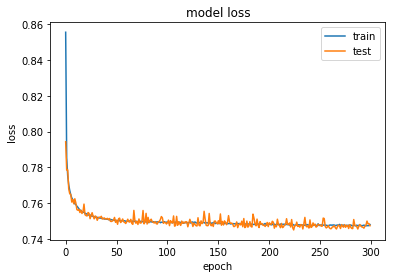

In [115]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [116]:
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)

In [117]:
error_df = pd.DataFrame({'reconstruction_error': mse,'true_class': y_test})
error_df.head(5)

,reconstruction_error,true_class
183484,0.378933,0
255448,0.261262,0
244749,1.121580,0
63919,0.771053,0
11475,0.775391,0


### Reconstruction error without fraud

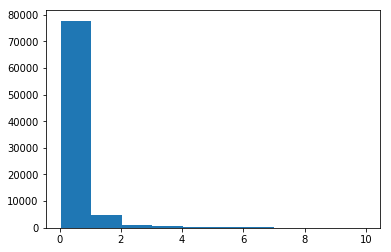

In [118]:
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_= ax.hist(normal_error_df.reconstruction_error.values, bins=10)

### Reconstruction error with Fraud

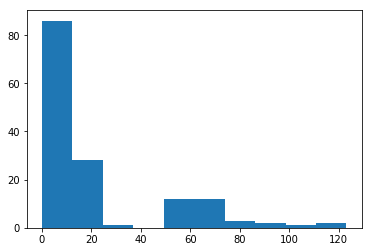

In [119]:
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)

In [120]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report, f1_score, precision_recall_fscore_support

### ROC-AUC curve

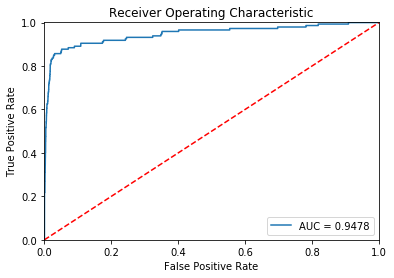

In [121]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

### Precision Recall Curve

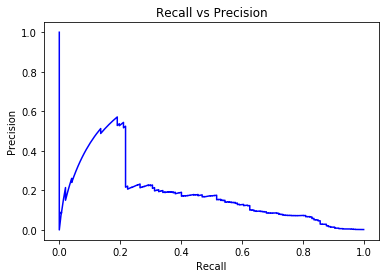

In [122]:
precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

### Precision for different threshold values

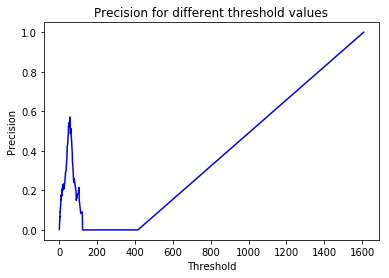

In [123]:
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

### Recall for different threshold values

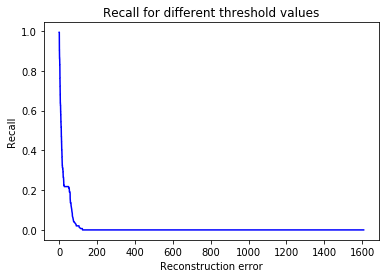

In [124]:
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall for different threshold values')
plt.xlabel('Reconstruction error')
plt.ylabel('Recall')
plt.show()

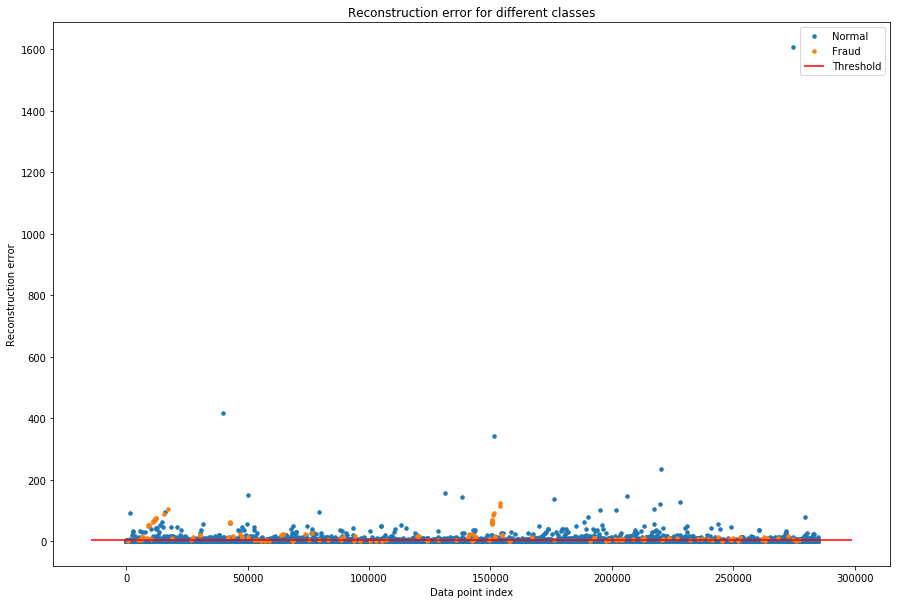

In [126]:
threshold = 2.9
groups = error_df.groupby('true_class')
fig, ax = plt.subplots(figsize=(15,10))

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show()

### Confusion Matrix

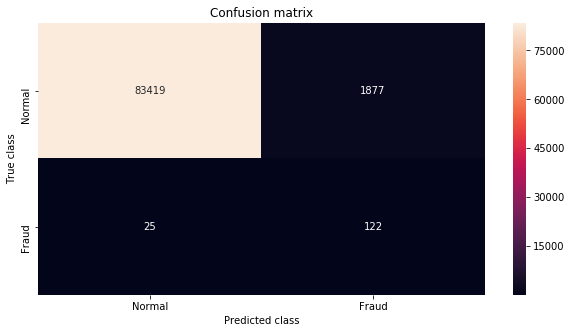

In [128]:
LABELS = ["Normal", "Fraud"]
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()